## `Spiral` Dataset

In [4]:
import numpy as np

def get_spiral(train=True):
    seed = 1984 if train else 2020
    np.random.seed(seed=seed)
    
    # num_data : number of data per class
    num_data, num_class, input_dim = 100, 3, 2
    
    data_size = num_class * num_data
    x = np.zeros((data_size, input_dim), dtype=np.float32)
    y = np.zeros(data_size, dtype=np.int)
    
    for class_i in range(num_class):
        for data_i in range(num_data):
            
            rate = data_i / num_data

            radius = 1.0 * rate
            theta = 4.0*class_i + 4.0*rate + 0.2*np.random.randn()
            
            ix = num_data*class_i + data_i
            x[ix] = np.array([radius * np.sin(theta),
                              radius * np.cos(theta)]).flatten()
            
            y[ix] = class_i
            
    # Shuffle
    indices = np.random.permutation(num_data * num_class)
    x = x[indices]
    y = y[indices]
    
    return x, y

In [3]:
radius = 0.5
theta = np.sin(2.)

radius * np.sin(theta), radius * np.cos(theta)

(0.3945361717864442, 0.3071501410582411)

In [15]:
import dezero

x, y = dezero.datasets.get_spiral(train=True)

print(x.shape)
print(y.shape)

print(x[10], y[10])
print(x[110], y[110])

(300, 2)
(300,)
[-0.12995958 -0.00324155] 1
[ 0.3282343  -0.54941994] 0


In [18]:
data = []
for xs in zip(*x):
    data.append(xs)

x0, x1 = data
x0, x1 = np.array(x0), np.array(x1)

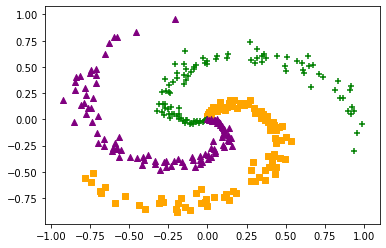

In [49]:
import matplotlib.pyplot as plt

colormap = plt.cm.get_cmap('rainbow', 3)
colors = ['orange', 'green', 'purple']
markers = ["s", "+", "^"]
for i in range(3):
    index = y == i
    marker = markers[i]
    color = colors[i]
    plt.scatter(x0[index], x1[index], c=color, cmap=colormap, marker=marker)

## Train

In [3]:
import math
import numpy as np
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

x, y = dezero.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size)

In [4]:
epoch_list = []
loss_list = []

for epoch in range(max_epoch):
    index = np.random.permutation(data_size)
    sum_loss = 0
    
    for i in range(max_iter):
        # mini batch
        batch_index = index[i*batch_size:(i + 1)*batch_size]
        batch_x = x[batch_index]
        batch_y = y[batch_index]

        # model train
        y_pred = model(batch_x)
        loss = F.softmax_cross_entropy(y_pred, batch_y)
        
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(batch_y)
        
    avg_loss = sum_loss / data_size
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))
    
    epoch_list.append(epoch + 1)
    loss_list.append(avg_loss)

epoch 1, loss 1.13
epoch 2, loss 1.05
epoch 3, loss 0.95
epoch 4, loss 0.92
epoch 5, loss 0.87
epoch 6, loss 0.89
epoch 7, loss 0.84
epoch 8, loss 0.78
epoch 9, loss 0.80
epoch 10, loss 0.79
epoch 11, loss 0.78
epoch 12, loss 0.76
epoch 13, loss 0.77
epoch 14, loss 0.76
epoch 15, loss 0.76
epoch 16, loss 0.77
epoch 17, loss 0.78
epoch 18, loss 0.74
epoch 19, loss 0.74
epoch 20, loss 0.72
epoch 21, loss 0.73
epoch 22, loss 0.74
epoch 23, loss 0.77
epoch 24, loss 0.73
epoch 25, loss 0.74
epoch 26, loss 0.74
epoch 27, loss 0.72
epoch 28, loss 0.72
epoch 29, loss 0.72
epoch 30, loss 0.73
epoch 31, loss 0.71
epoch 32, loss 0.72
epoch 33, loss 0.72
epoch 34, loss 0.71
epoch 35, loss 0.72
epoch 36, loss 0.71
epoch 37, loss 0.71
epoch 38, loss 0.70
epoch 39, loss 0.71
epoch 40, loss 0.70
epoch 41, loss 0.71
epoch 42, loss 0.70
epoch 43, loss 0.70
epoch 44, loss 0.70
epoch 45, loss 0.69
epoch 46, loss 0.69
epoch 47, loss 0.71
epoch 48, loss 0.70
epoch 49, loss 0.69
epoch 50, loss 0.69
epoch 51,

### Loss graph

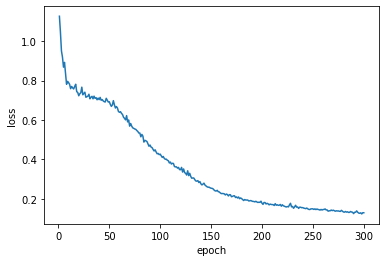

In [5]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Decision boundary

In [6]:
x0_min, x0_max = -1, 1
x1_min, x1_max = -1, 1

XX0, XX1 = np.meshgrid(np.arange(x0_min, x0_max, (x0_max - x0_min)/1000),
                       np.arange(x0_min, x0_max, (x0_max - x0_min)/1000))

In [7]:
XS = np.array([XX0.ravel(), XX1.ravel()]).T
XS

array([[-1.   , -1.   ],
       [-0.998, -1.   ],
       [-0.996, -1.   ],
       ...,
       [ 0.994,  0.998],
       [ 0.996,  0.998],
       [ 0.998,  0.998]])

In [8]:
predict_y = model(XS)
predict_y

Variable([[  7.67202684 -10.14565061   1.21867176]
          [  7.68629395 -10.16270343   1.22345694]
          [  7.70044268 -10.17979678   1.22838004]
          ...
          [ -3.410447     7.71866046  -5.72651772]
          [ -3.40295823   7.69535059  -5.71018448]
          [ -3.39549573   7.6721344   -5.69391909]])

In [12]:
YY = np.reshape(np.argmax(predict_y.data, axis=1), XX0.shape)
YY

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=int64)

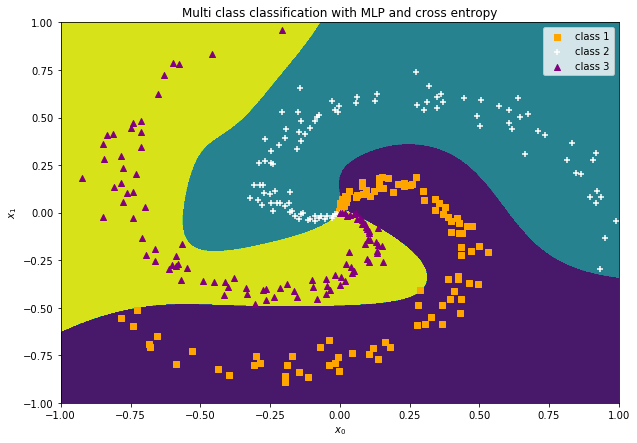

In [27]:
plt.figure(figsize=(10, 7))
plt.contourf(XX0, XX1, YY)

data = []
for xs in zip(*x):
    data.append(xs)

x0, x1 = data
x0, x1 = np.array(x0), np.array(x1)

colormap = plt.cm.get_cmap('rainbow', 3)
colors = ['orange', 'white', 'purple']
markers = ["s", "+", "^"]
for i in range(3):
    index = y == i
    marker = markers[i]
    color = colors[i]
    plt.scatter(x0[index], x1[index], c=color, cmap=colormap, marker=marker, label=f"class {i + 1}")
    
plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)

plt.xlabel("$x_0$")
plt.ylabel("$x_1$")

plt.title('Multi class classification with MLP and cross entropy')
plt.legend()
plt.show()